In [641]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [642]:
import os
print(os.getcwd())

/Users/harianshsehgal/Development/induction_project/notebooks


In [643]:
file_path = '/Users/harianshsehgal/Development/induction_project/data/Modeling dataset.csv'
df = pd.read_csv(file_path)
df.head()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,earliest_cr_line,purpose,desc,loan_status
0,1002603,30000,1,93000.0,0,1,120,130,10,0,43209,0.41,32,7/18/1990 3:54,debt_consolidation,NaN,Current
1,1024806,22000,6,70000.0,1,0,10,130,11,0,38928,0.85,36,10/7/1983 8:46,debt_consolidation,Borrower added on 11/09/11 > This loan is fo...,Fully Paid
2,663413,3700,10,117000.0,1,1,10,130,9,0,19382,0.86,24,4/7/1992 11:32,credit_card,Borrower added on 01/28/11 > pay off credit ...,Fully Paid
3,810093,7600,1,33996.0,0,0,120,130,10,0,1962,0.48,18,1/21/2003 2:40,other,Borrower added on 07/11/11 > I have been con...,Current
4,865474,12000,7,75000.0,0,1,24,130,13,0,13528,0.51,23,9/8/1997 7:19,debt_consolidation,NaN,Fully Paid


In [644]:
df.shape

(15000, 17)

In [645]:
df.describe()

,id,loan_amnt,emp_length,annual_inc,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,1.500000e+04,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,6.851470e+05,11235.113333,5.037667,6.818813e+04,0.143667,0.869133,90.317000,125.894133,9.327333,0.053600,13482.444933,0.489505,22.270933
std,2.084107e+05,7417.557711,3.352978,5.101434e+04,0.477188,1.062865,42.309275,19.084559,4.444776,0.233089,16094.076787,0.282652,11.528179
min,5.473400e+04,500.000000,1.000000,6.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000
25%,5.203982e+05,5500.000000,2.000000,4.056300e+04,0.000000,0.000000,48.000000,130.000000,6.000000,0.000000,3716.500000,0.260000,14.000000
50%,6.701385e+05,10000.000000,4.000000,5.900000e+04,0.000000,1.000000,120.000000,130.000000,9.000000,0.000000,8901.000000,0.490000,21.000000
75%,8.372712e+05,15000.000000,8.000000,8.200000e+04,0.000000,1.000000,120.000000,130.000000,12.000000,0.000000,17117.500000,0.720000,29.000000
max,1.075269e+06,35000.000000,10.000000,2.039784e+06,8.000000,8.000000,120.000000,130.000000,42.000000,4.000000,149527.000000,1.000000,81.000000


### The range for different features is very different, so scaling will be required 

In [647]:
df.isnull().sum()

id                           0
loan_amnt                    0
emp_length                   0
annual_inc                   0
delinq_2yrs                  0
inq_last_6mths               0
mths_since_last_delinq       0
mths_since_last_record       0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
earliest_cr_line             0
purpose                      0
desc                      4937
loan_status                  0
dtype: int64

In [648]:
# Checking for duplicate data
duplicated_data = df.duplicated()
duplicates_df = df[duplicated_data]

print("shape of duplicate data: ",duplicates_df.shape)
# print(duplicates_df)


shape of duplicate data:  (2509, 17)


In [649]:
duplicates_df['loan_status'].value_counts()

loan_status
Fully Paid            1559
Current                597
Charged Off            332
Late (31-120 days)      10
In Grace Period          9
Late (16-30 days)        2
Name: count, dtype: int64

In [650]:
# duplicate data is highly biased almost 1:7
# deleting duplicate data 
df = df.drop_duplicates()

In [651]:
df.shape

(12491, 17)

In [652]:
unique_counts = df.nunique()

# Print or display the number of unique values for each feature
print(unique_counts)

id                        12491
loan_amnt                   648
emp_length                   10
annual_inc                 2227
delinq_2yrs                   8
inq_last_6mths                9
mths_since_last_delinq       88
mths_since_last_record       95
open_acc                     35
pub_rec                       5
revol_bal                  9775
revol_util                  101
total_acc                    73
earliest_cr_line          12455
purpose                      14
desc                       8297
loan_status                   7
dtype: int64


In [653]:
unique_loan_status = df['loan_status'].unique()
print("unique_loan_status: ", unique_loan_status)

unique_loan_status:  ['Current' 'Fully Paid' 'Charged Off' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)' 'Default']


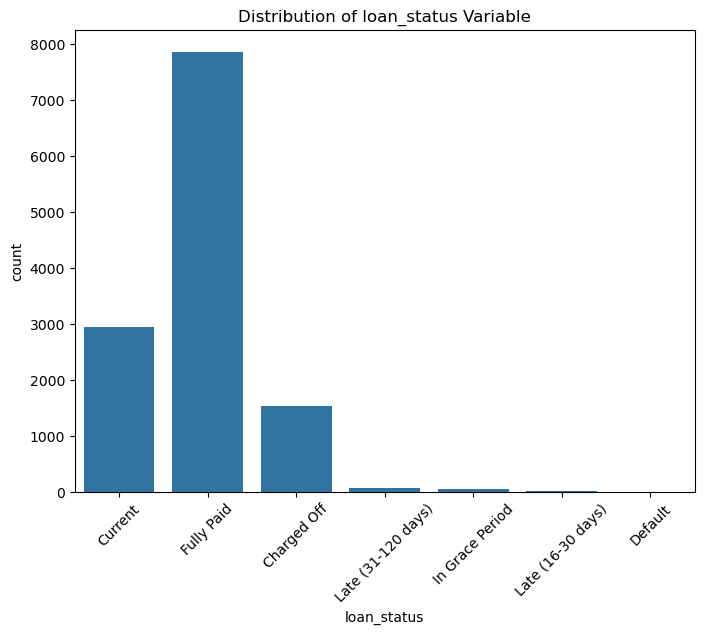

loan_status
Fully Paid            7857
Current               2945
Charged Off           1540
Late (31-120 days)      68
In Grace Period         54
Late (16-30 days)       21
Default                  6
Name: count, dtype: int64


In [654]:
# Distribution of the loan_status variable
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of loan_status Variable')
plt.xticks(rotation=45)
plt.show()
print(df['loan_status'].value_counts(normalize=False))

In [ ]:
# Loan Status According to

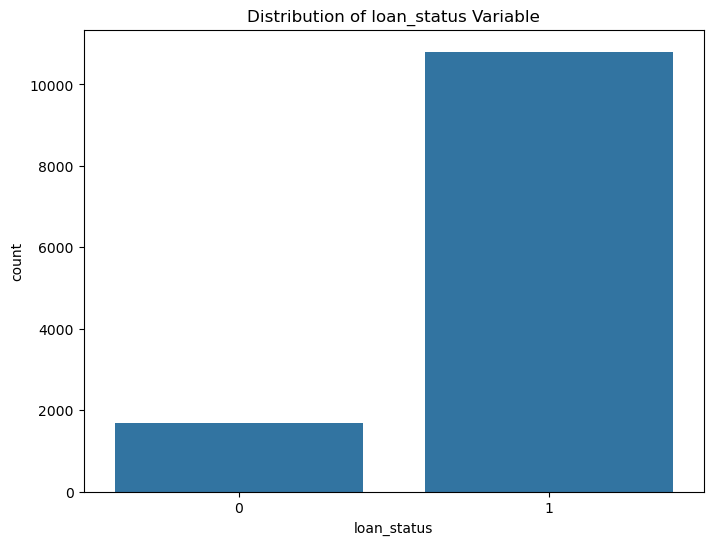

loan_status
1    10802
0     1689
Name: count, dtype: int64


In [655]:
loan_status_mapping = {
    'Current': 1,
    'Fully Paid': 1,
    'In Grace Period': 0,
    'Late (16-30 days)': 0,
    'Charged Off': 0,
    'Late (31-120 days)': 0,
    'Default': 0
}

df['loan_status'] = df['loan_status'].map(loan_status_mapping)
df['loan_status'] = df['loan_status'].fillna(-1).astype(int)


# Distribution of the loan_status variable
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of loan_status Variable')
plt.show()

print(df['loan_status'].value_counts(normalize=False))

In [656]:
unique_purposes = df['purpose'].unique()
print("unique_purposes: ", unique_purposes)

unique_purposes:  ['debt_consolidation' 'credit_card' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'car' 'wedding' 'medical' 'house'
 'moving' 'vacation' 'educational' 'renewable_energy']


In [674]:
# analyse different types of purposes with respect to loan status
purpose_loan_status = df.groupby(['purpose', 'loan_status'])['loan_status'].count().unstack().fillna(0)
purpose_totals = purpose_loan_status.sum(axis=1)

# percentage of paid loans for each purpose
percentage_paid = purpose_loan_status[1] / purpose_totals * 100
sorted_percentages = percentage_paid.sort_values()
print("percentage of paid loans for each purpose: ")
print(sorted_percentages)

percentage of paid loans for each purpose: 
purpose
small_business        73.476703
renewable_energy      75.757576
educational           79.807692
moving                82.911392
medical               84.112150
other                 84.709730
house                 85.714286
debt_consolidation    86.453243
vacation              87.068966
home_improvement      87.847580
car                   88.071571
major_purchase        90.043290
credit_card           90.173410
wedding               90.764331
dtype: float64


In [563]:
# keeping cut off percentage as 85% as bank would like to give loans with higher chances of payback.
# mapping all above 85% same one kind and below 85% as other kind 
purpose_mapping = {
    'small_business':0,
    'educational':0,
    'renewable_energy':0,
    'medical':0,
    'moving':0,
    'other':0,
    'vacation':1,
    'debt_consolidation':1,
    'house':1,
    'car':1,
    'home_improvement':1,
    'major_purchase':1,
    'credit_card':1,
    'wedding':1
}
# Replacing text fields with numbers
df['purpose'] = df['purpose'].map(purpose_mapping)
# .infer_objects(copy=False)
df['purpose'] = df['purpose'].fillna(-1).astype(int)

print(df['purpose'].head())

0    1
1    1
2    1
3    0
4    1
Name: purpose, dtype: int64


In [564]:
df['purpose'].value_counts()

purpose
1    10201
0     2290
Name: count, dtype: int64

## Adding New features : debt to income ratio and  credit age

In [566]:
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Calculate age of credit line in years
now = datetime.now()
df['credit_age'] = (now - df['earliest_cr_line']).dt.days / 365.25

In [567]:
# Drop columns
columns_to_drop = ['earliest_cr_line']
df = df.drop(columns=columns_to_drop)

print("\nDataFrame after dropping columns:")
# print(df)
print(list(df.columns))


DataFrame after dropping columns:
['id', 'loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'purpose', 'desc', 'loan_status', 'credit_age']


In [568]:
# compute debt to income ratio loan_amnt/annual_inc
df['dti'] = df['loan_amnt'] / df['annual_inc']
print(df.head())


        id  loan_amnt  emp_length  annual_inc  delinq_2yrs  inq_last_6mths  \
0  1002603      30000           1     93000.0            0               1   
1  1024806      22000           6     70000.0            1               0   
2   663413       3700          10    117000.0            1               1   
3   810093       7600           1     33996.0            0               0   
4   865474      12000           7     75000.0            0               1   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     120                     130        10        0   
1                      10                     130        11        0   
2                      10                     130         9        0   
3                     120                     130        10        0   
4                      24                     130        13        0   

   revol_bal  revol_util  total_acc  purpose  \
0      43209        0.41         32        1   
1 

In [569]:
continuous_features = df.select_dtypes(include=['float64', 'int64']).columns
continuous_features = [feature for feature in continuous_features if feature not in ['id', 'loan_status','purpose']]

In [570]:
print(continuous_features)

['loan_amnt', 'emp_length', 'annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'credit_age', 'dti']


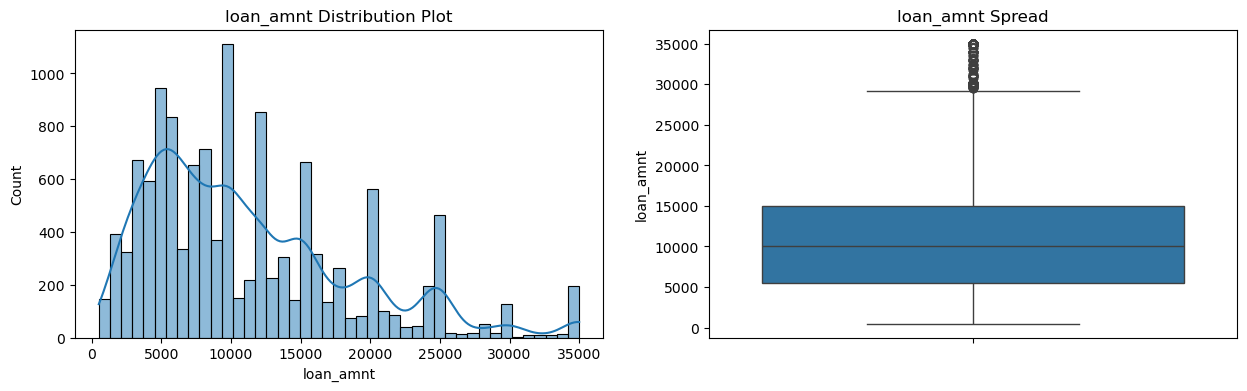

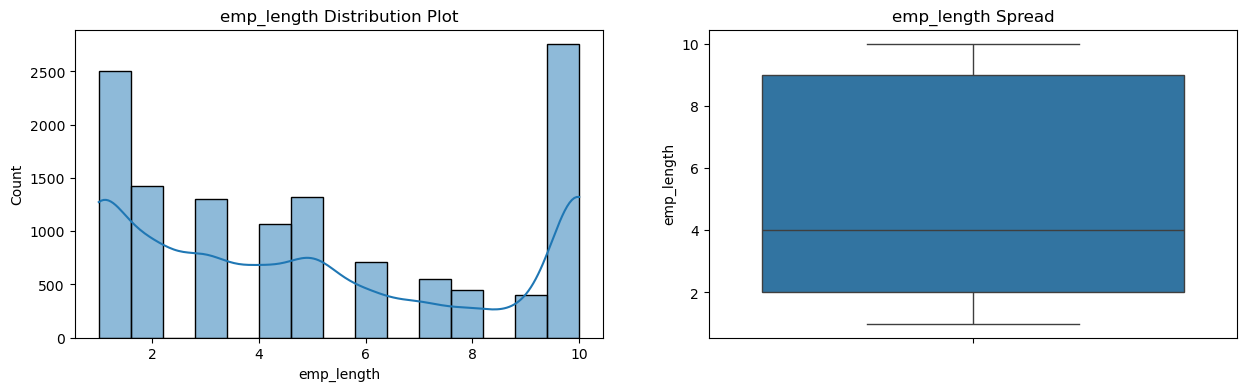

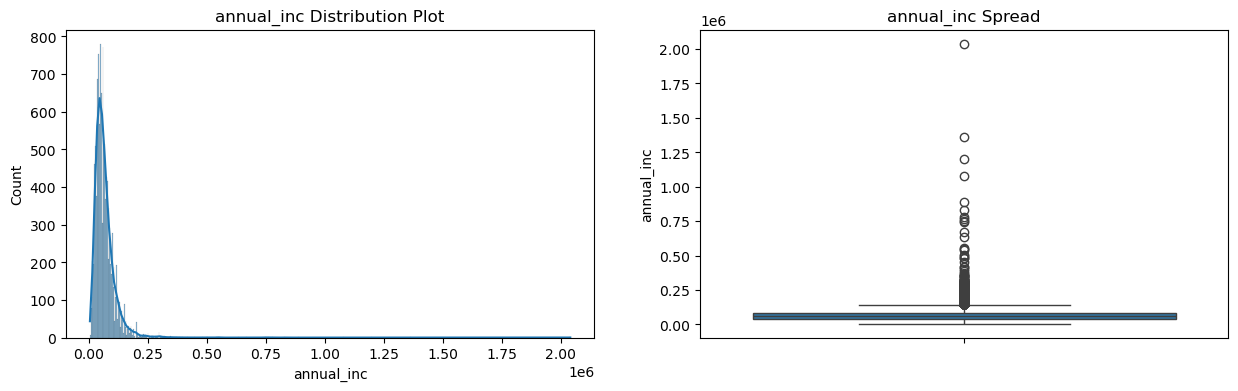

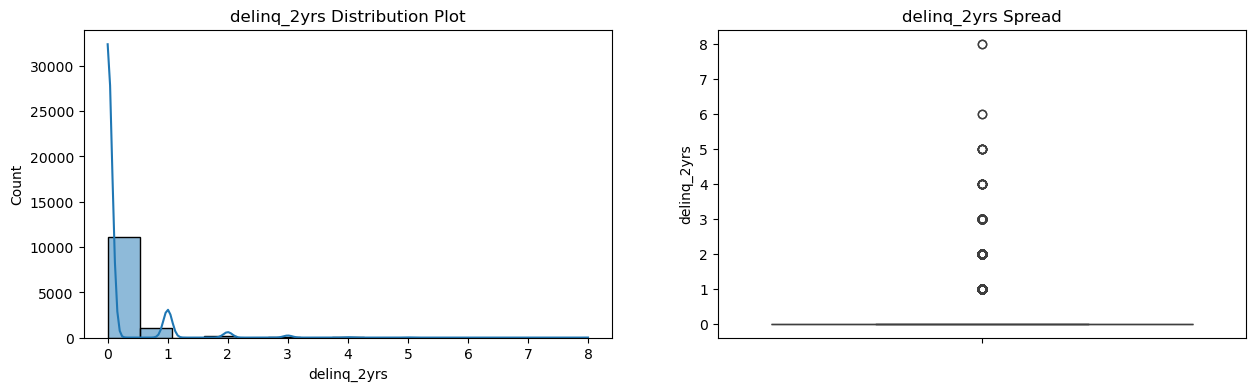

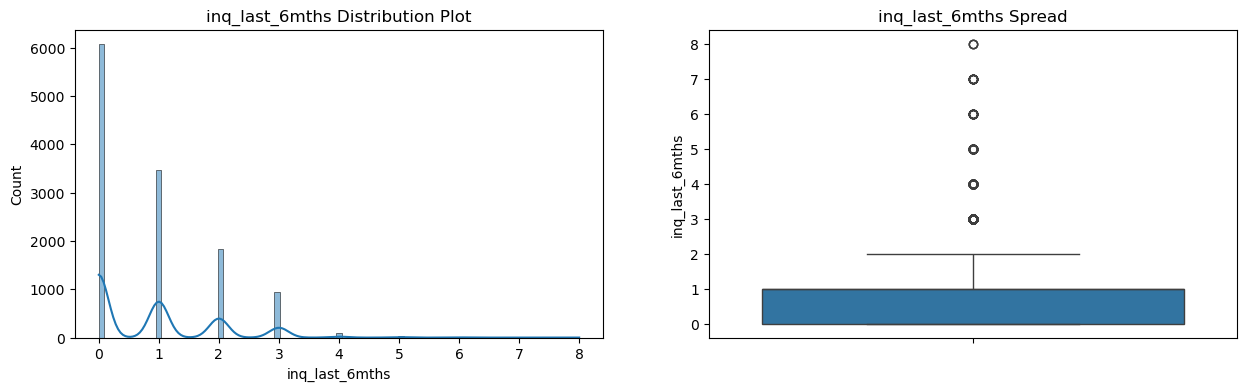

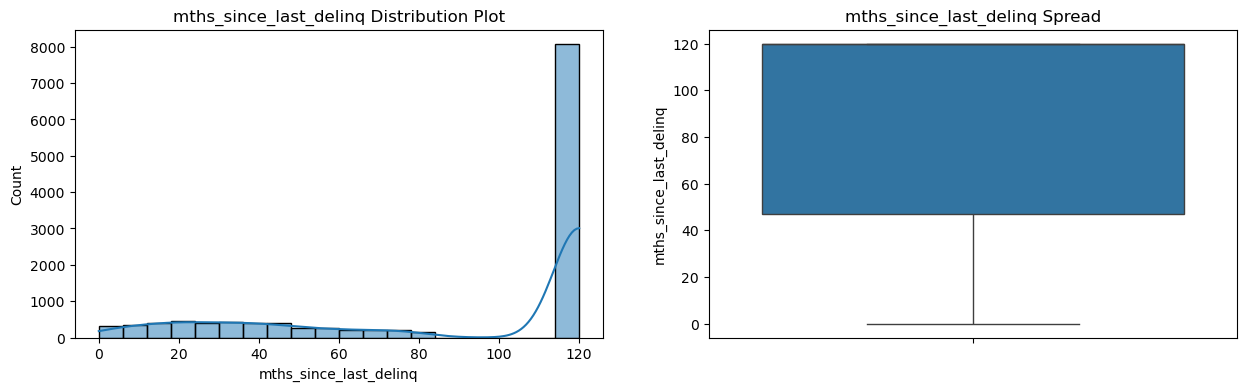

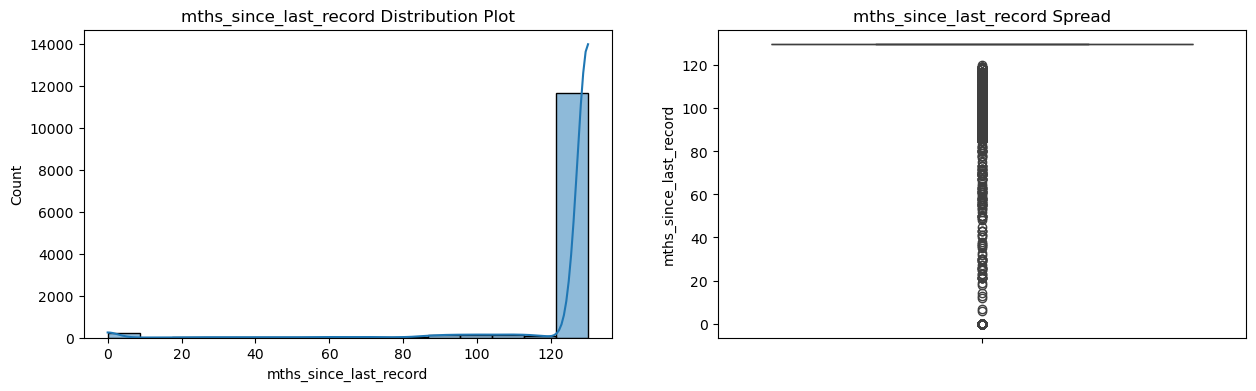

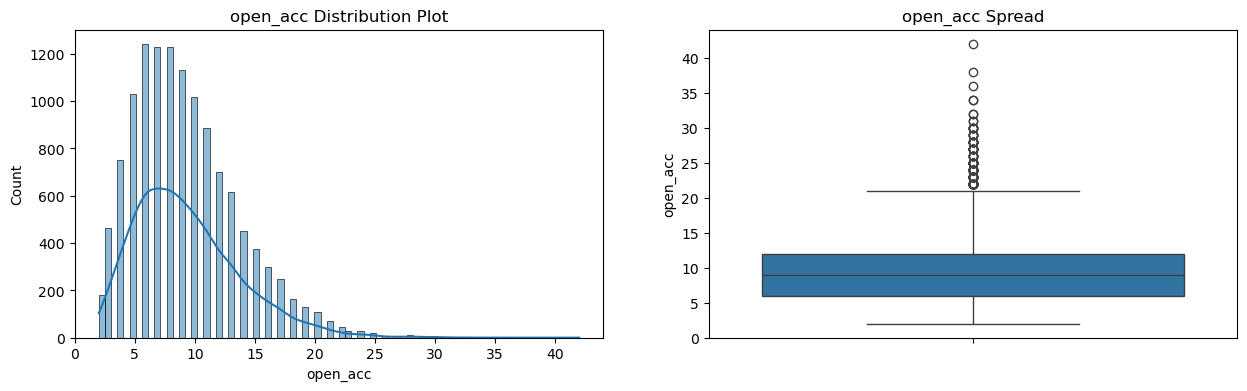

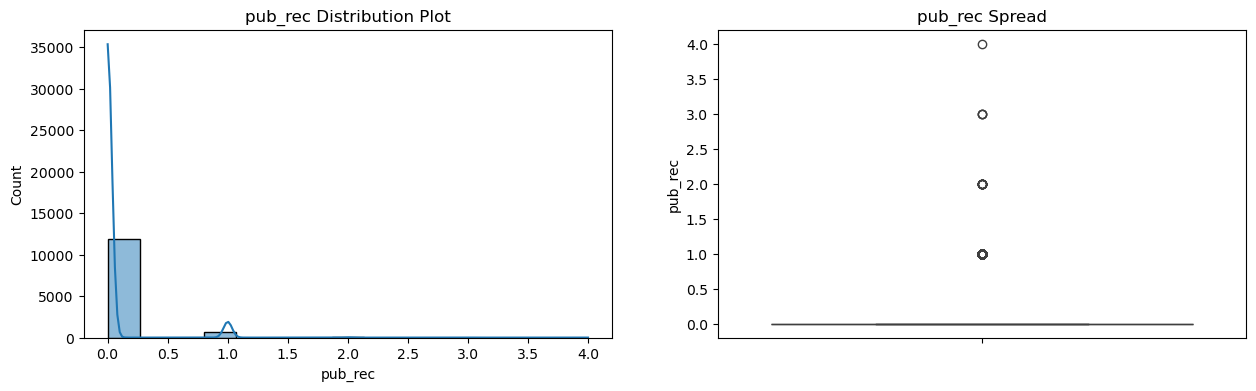

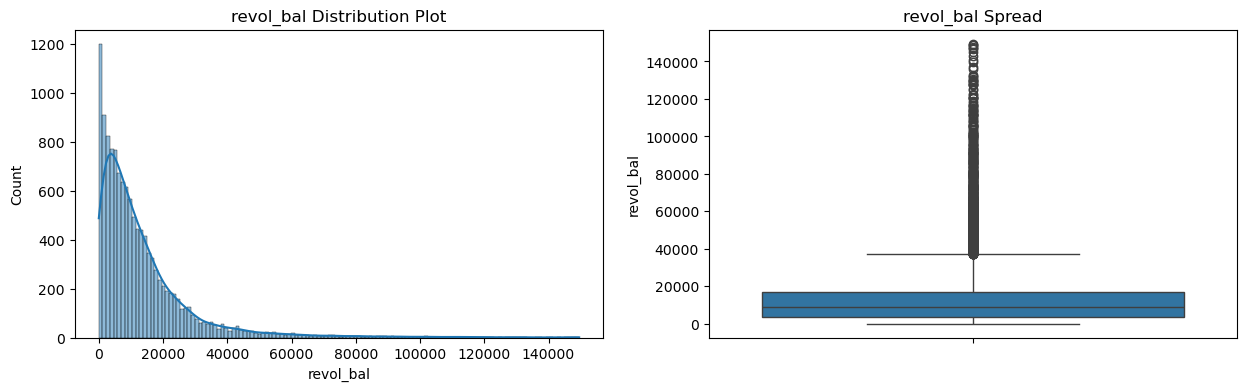

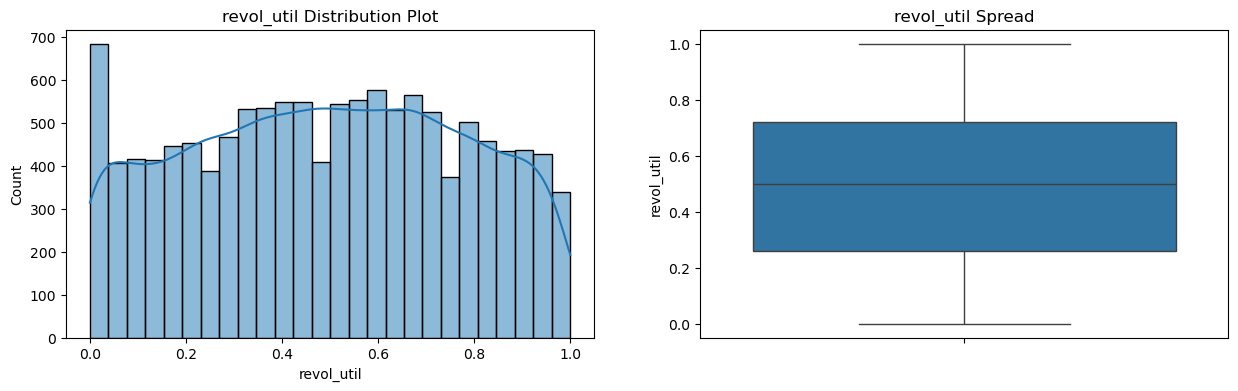

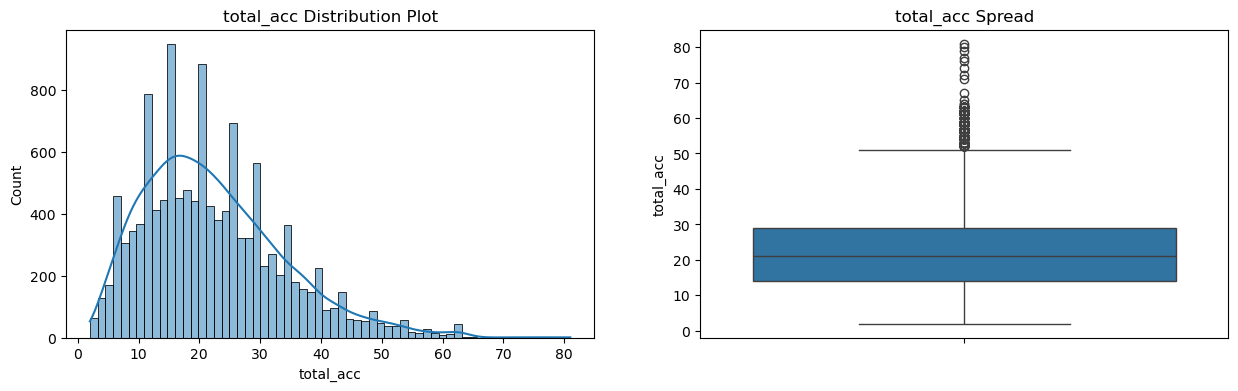

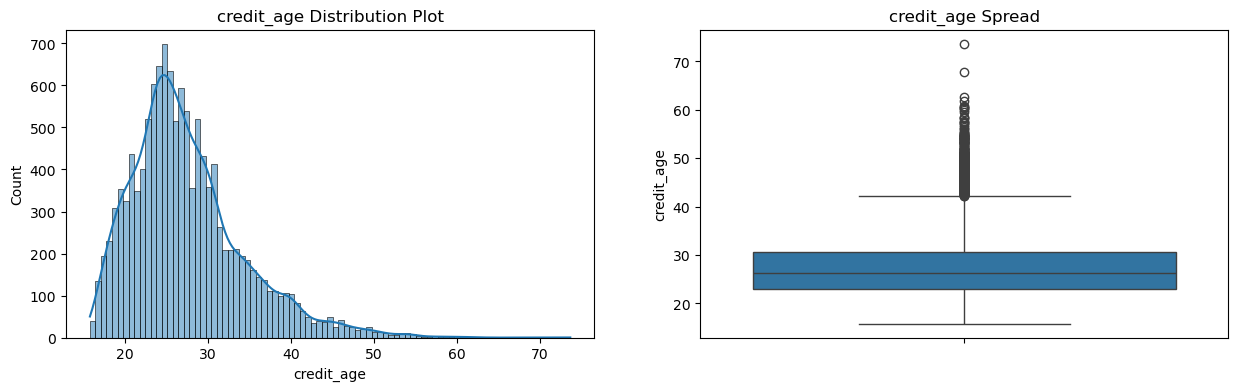

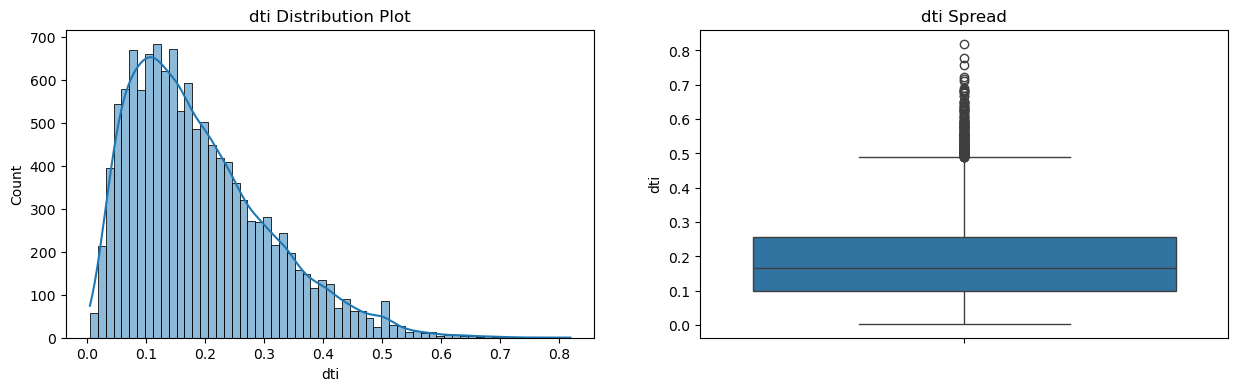

In [571]:
# Plot histograms and boxplots for each feature
for feature in continuous_features:
    plt.figure(figsize=(15,4))
    
    # Plot histogram with KDE
    plt.subplot(1,2,1)
    plt.title(f'{feature} Distribution Plot')
    sns.histplot(df[feature], kde=True)  # Use histplot with kde=True for a KDE curve

    # Plot boxplot
    plt.subplot(1,2,2)
    plt.title(f'{feature} Spread')
    sns.boxplot(y=df[feature])
    
    plt.show()

# Analysing each feature with respect to loan status

In [573]:
# Separating data by loan_status
df_0 = df[df['loan_status'] == 0]
df_1 = df[df['loan_status'] == 1]

In [680]:
# Calculate mean of continuous features for each loan_status
means_0 = df_0[continuous_features].mean()
means_1 = df_1[continuous_features].mean()


comparison_df = pd.DataFrame({
    'Loan Status 0 Mean': means_0,
    'Loan Status 1 Mean': means_1
})

print("Comparison of Average of Continuous Features by Loan Status:")
print(comparison_df)

Comparison of Average of Continuous Features by Loan Status:
                        Loan Status 0 Mean  Loan Status 1 Mean
loan_amnt                     11811.190053        11137.256989
emp_length                        4.988159            5.056471
annual_inc                    61490.418632        69301.816677
delinq_2yrs                       0.181172            0.140067
inq_last_6mths                    1.052694            0.832901
mths_since_last_delinq           87.161634           90.645436
mths_since_last_record          125.037892          126.046380
open_acc                          9.200710            9.341418
pub_rec                           0.079929            0.049898
revol_bal                     13409.358200        13532.495742
revol_util                        0.560705            0.480050
total_acc                        21.641800           22.366969
credit_age                       27.134199           27.560560
dti                               0.213829            0.1

## Distributions and spread for each feature for different loan status

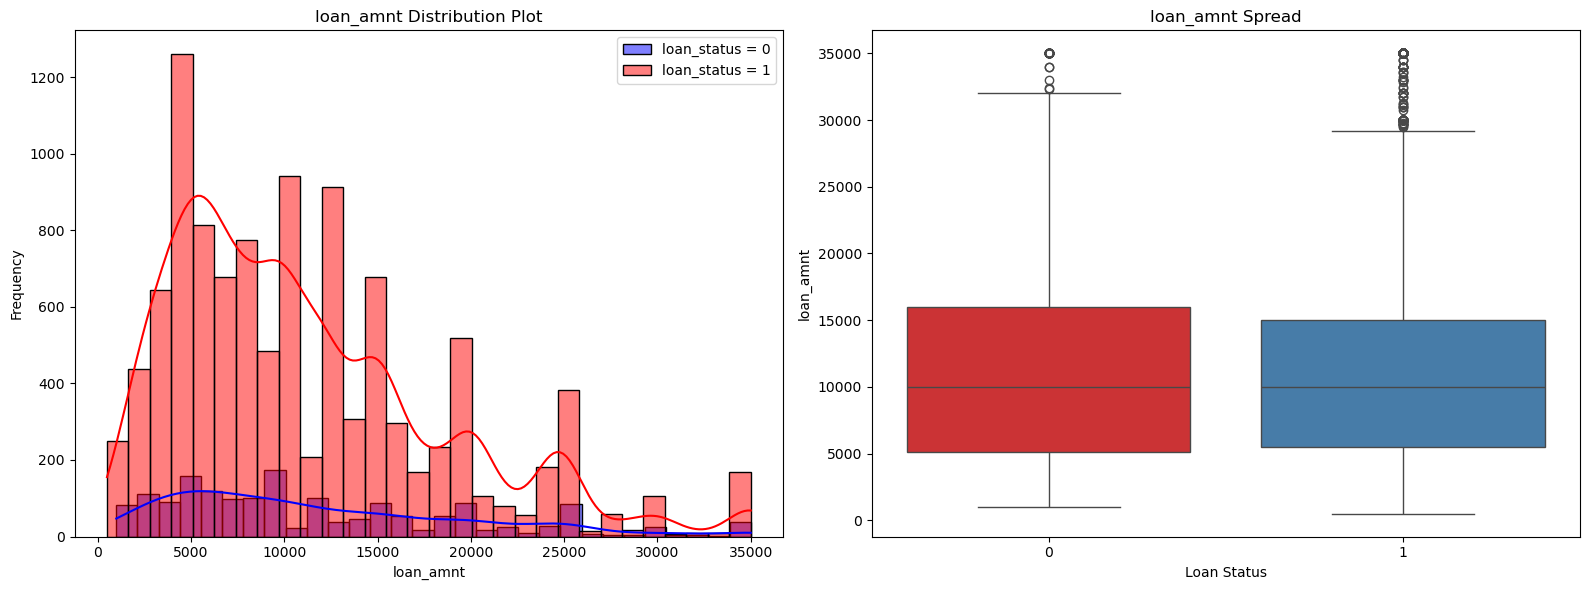

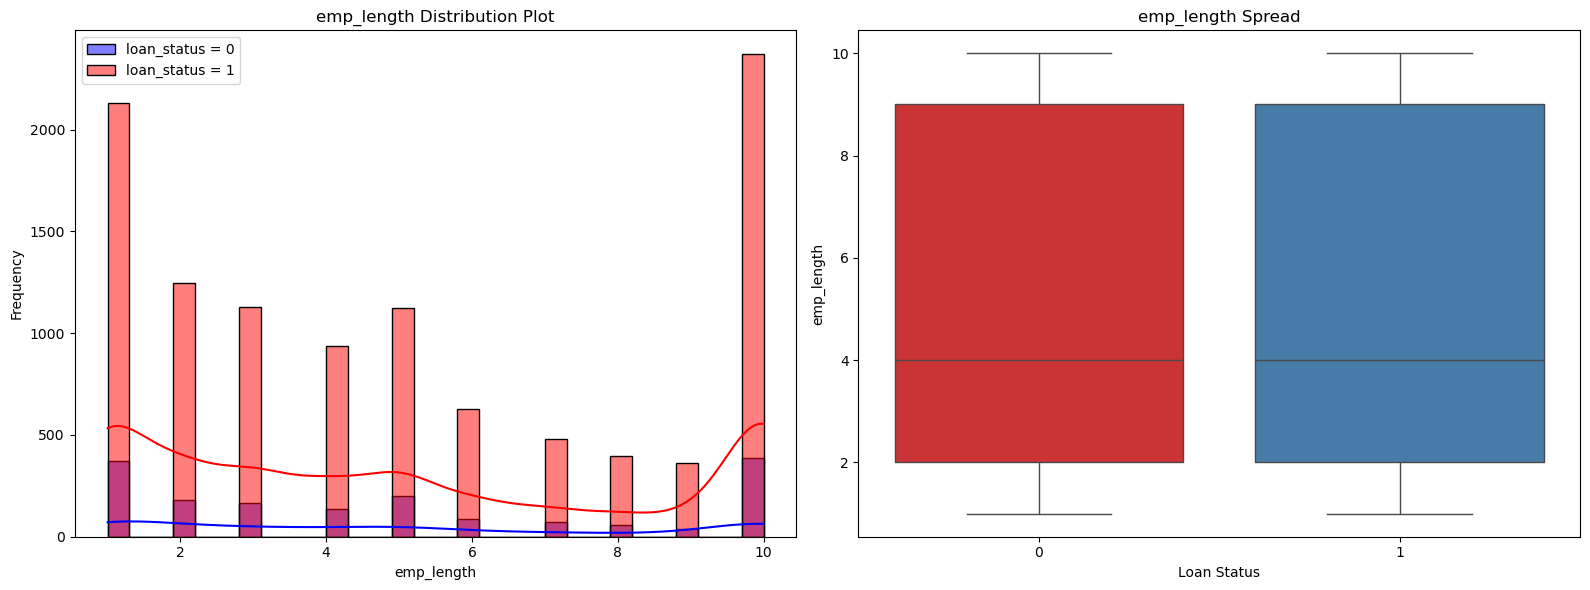

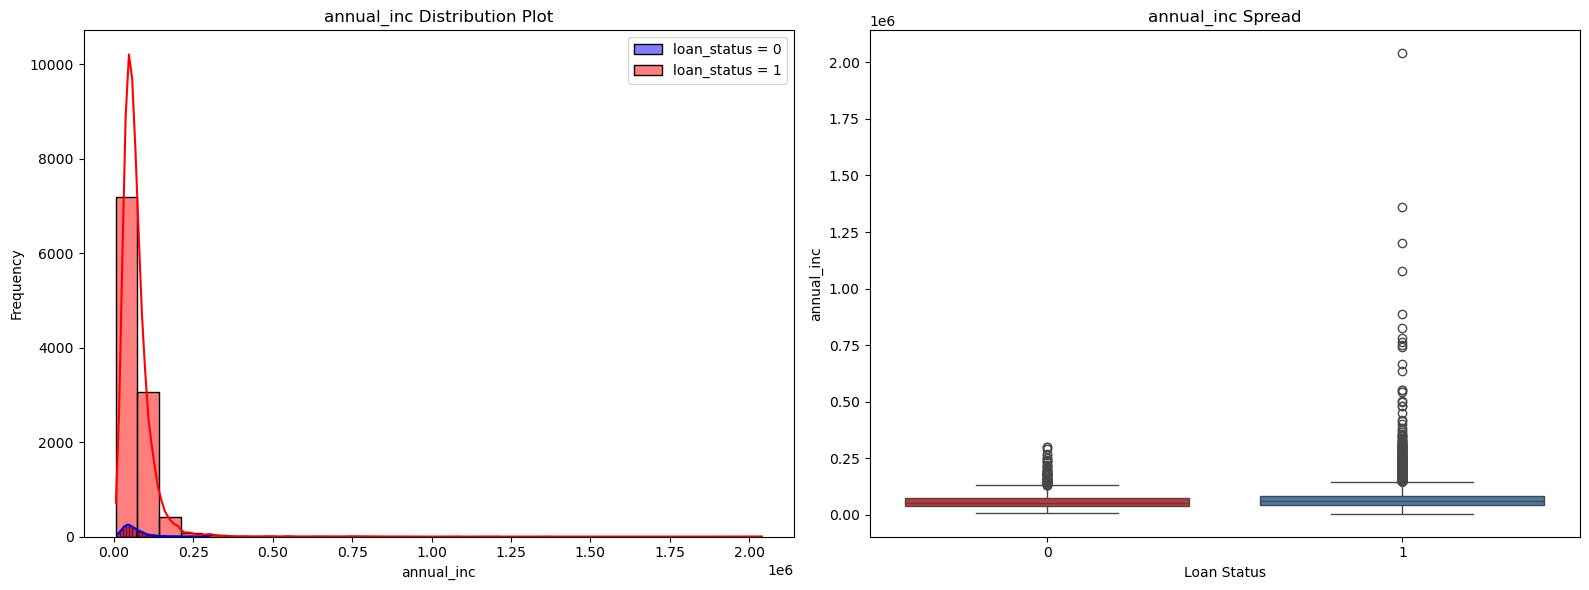

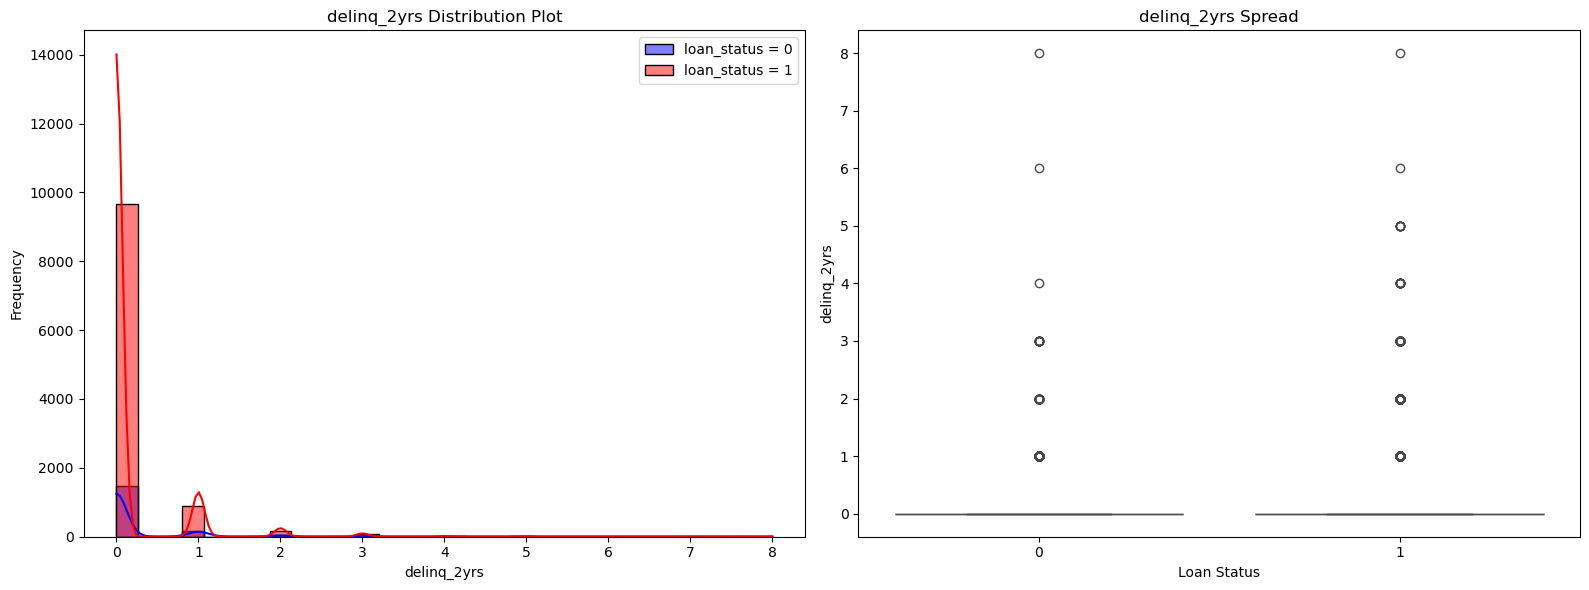

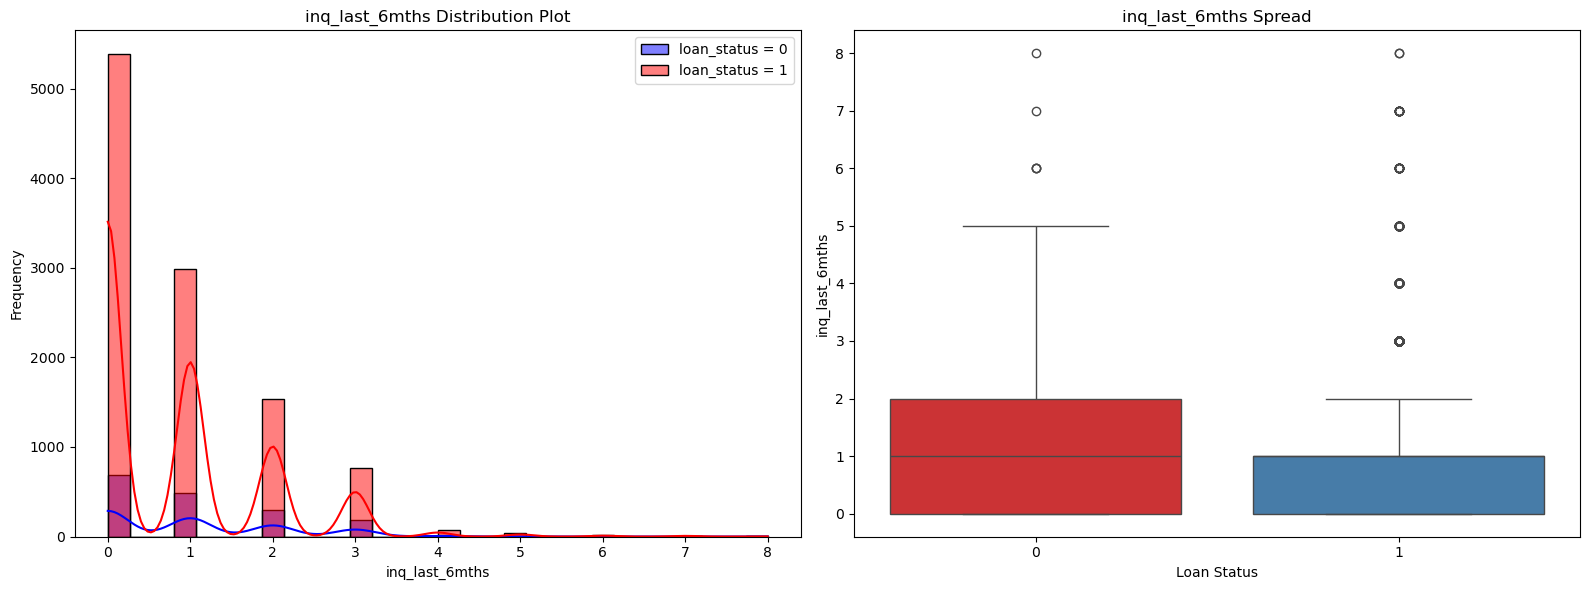

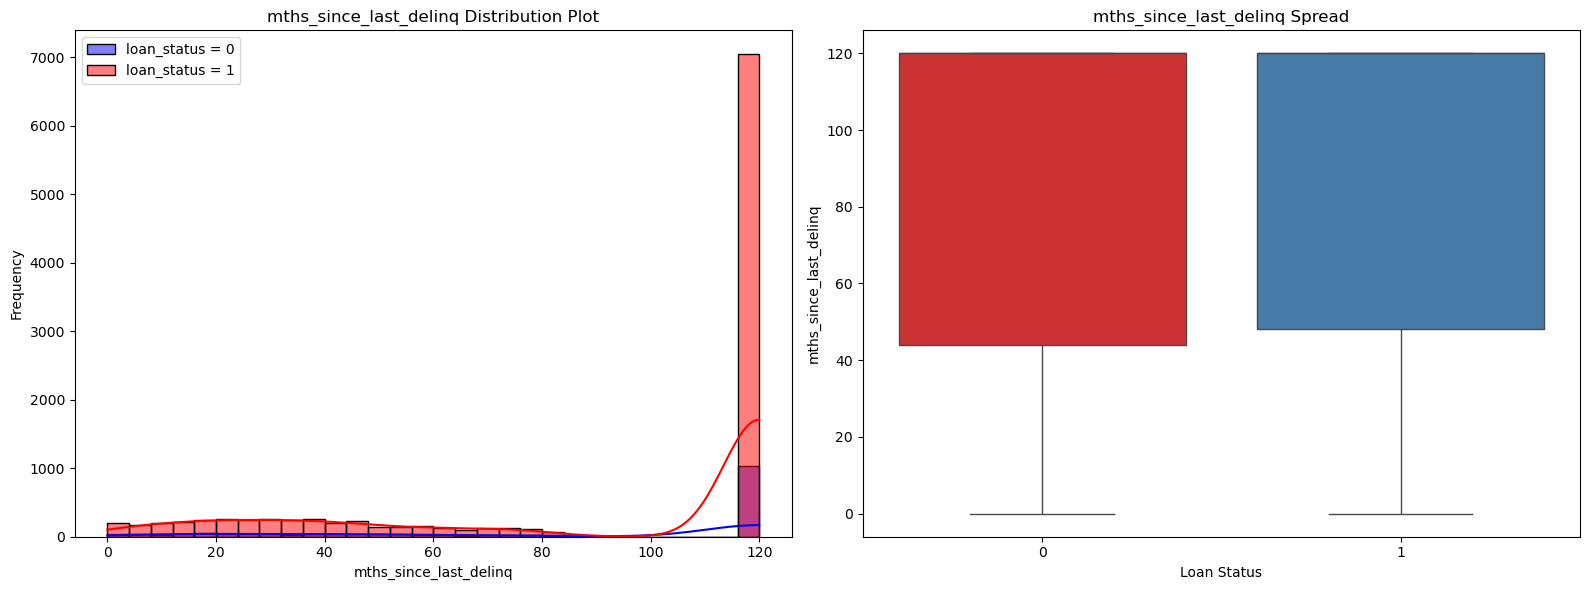

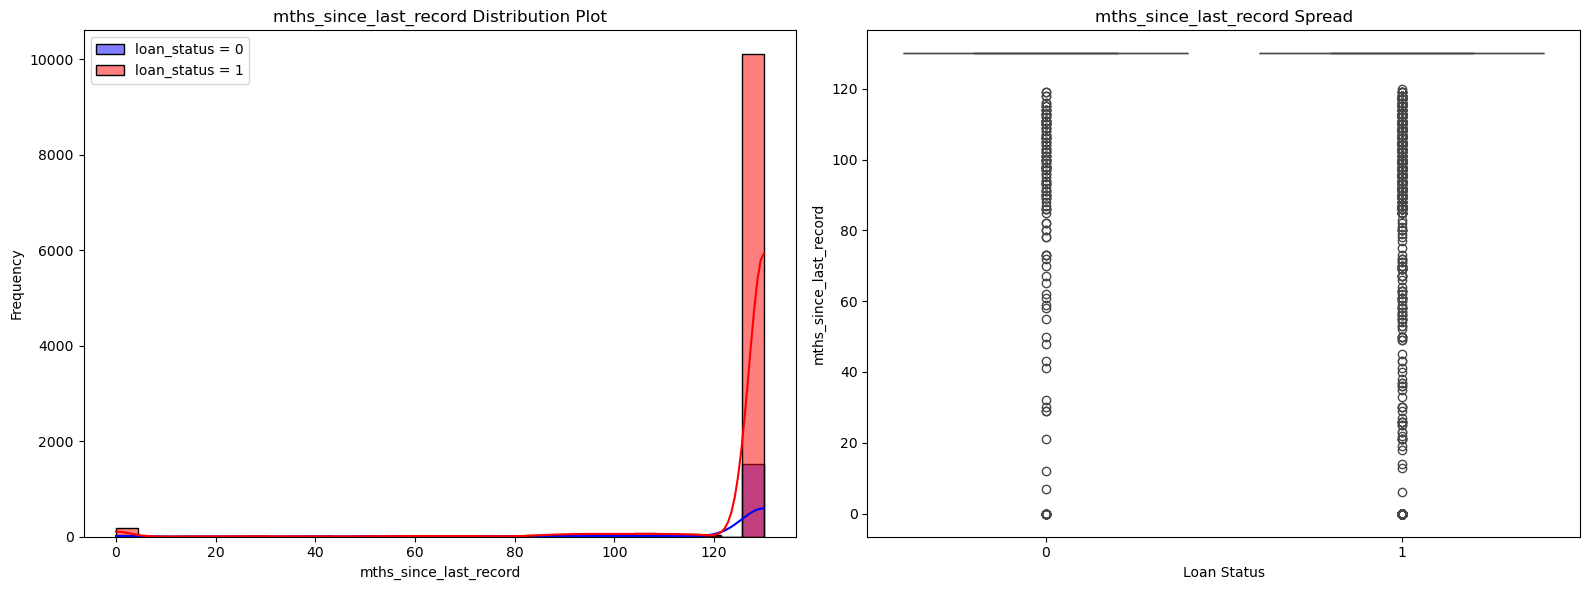

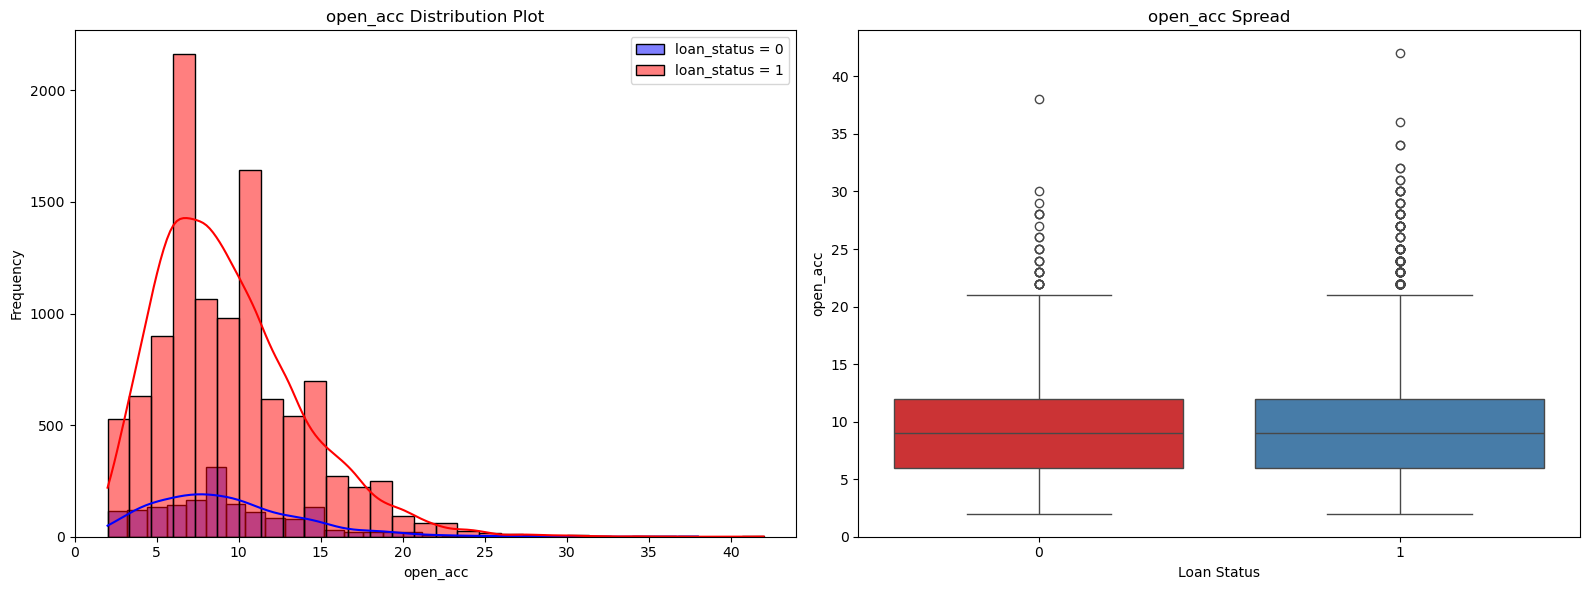

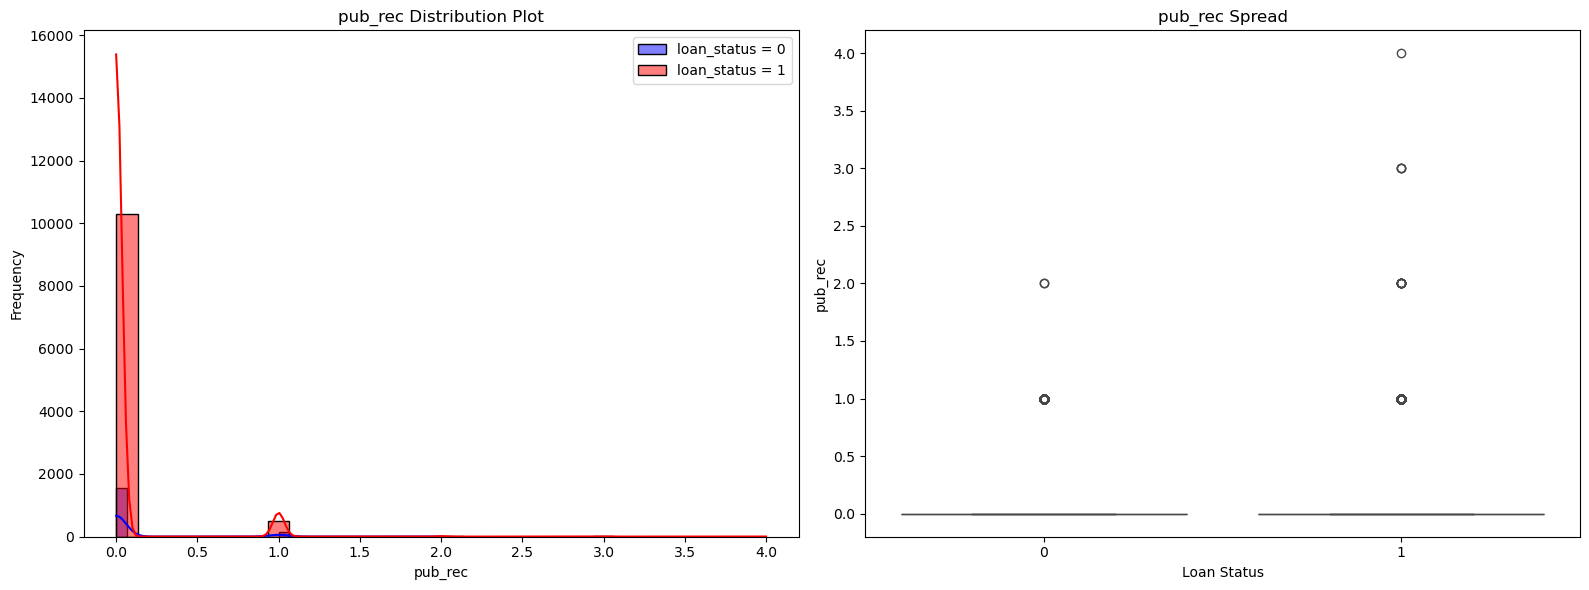

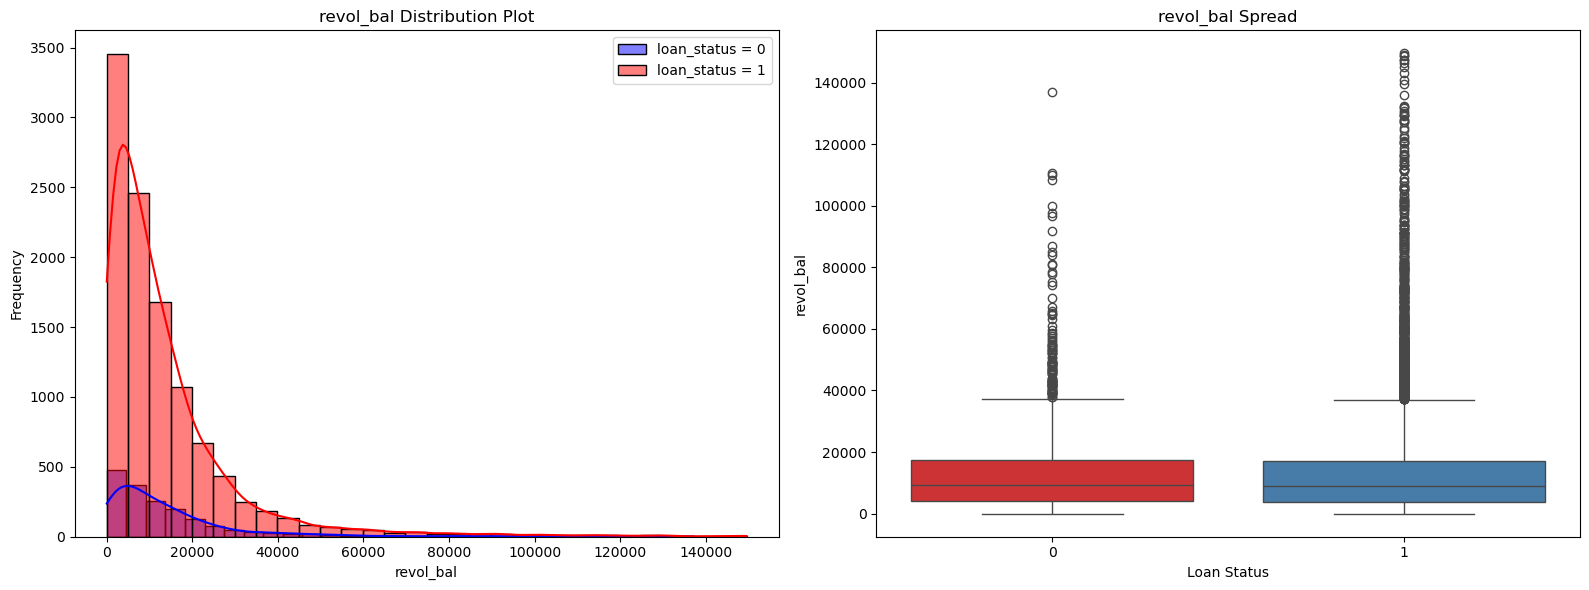

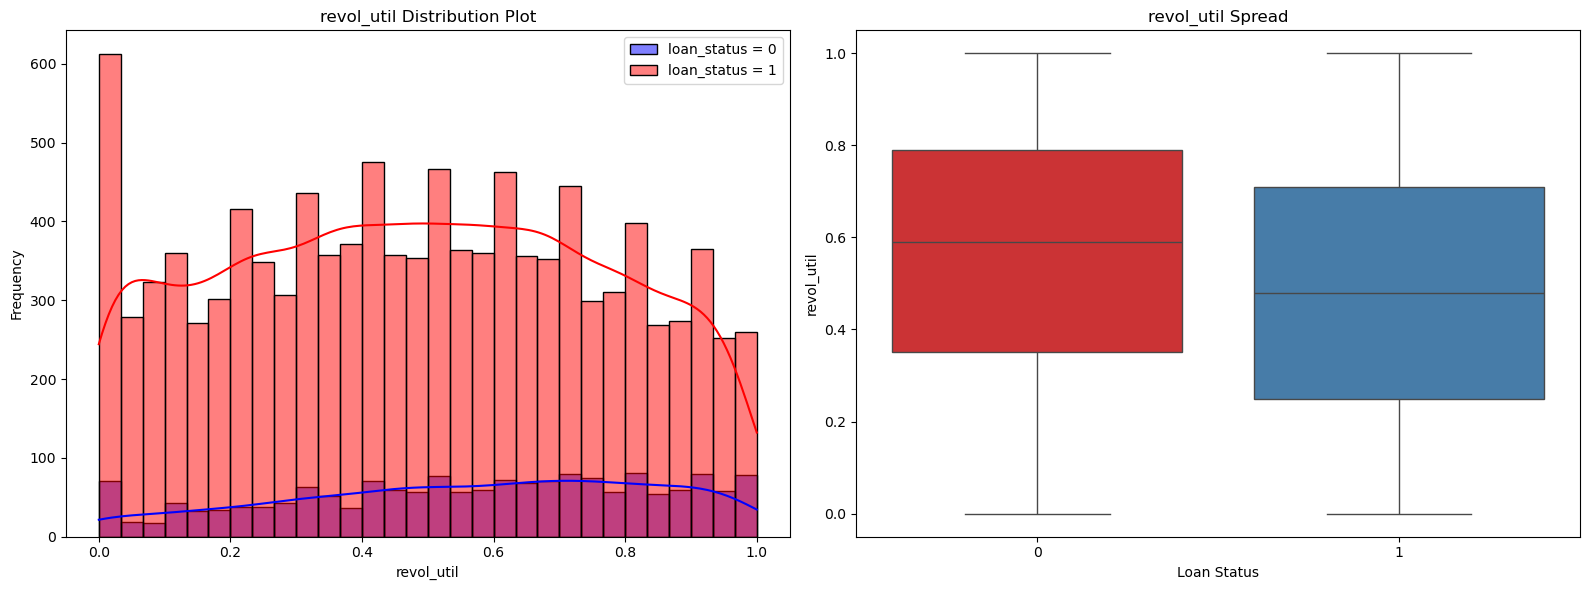

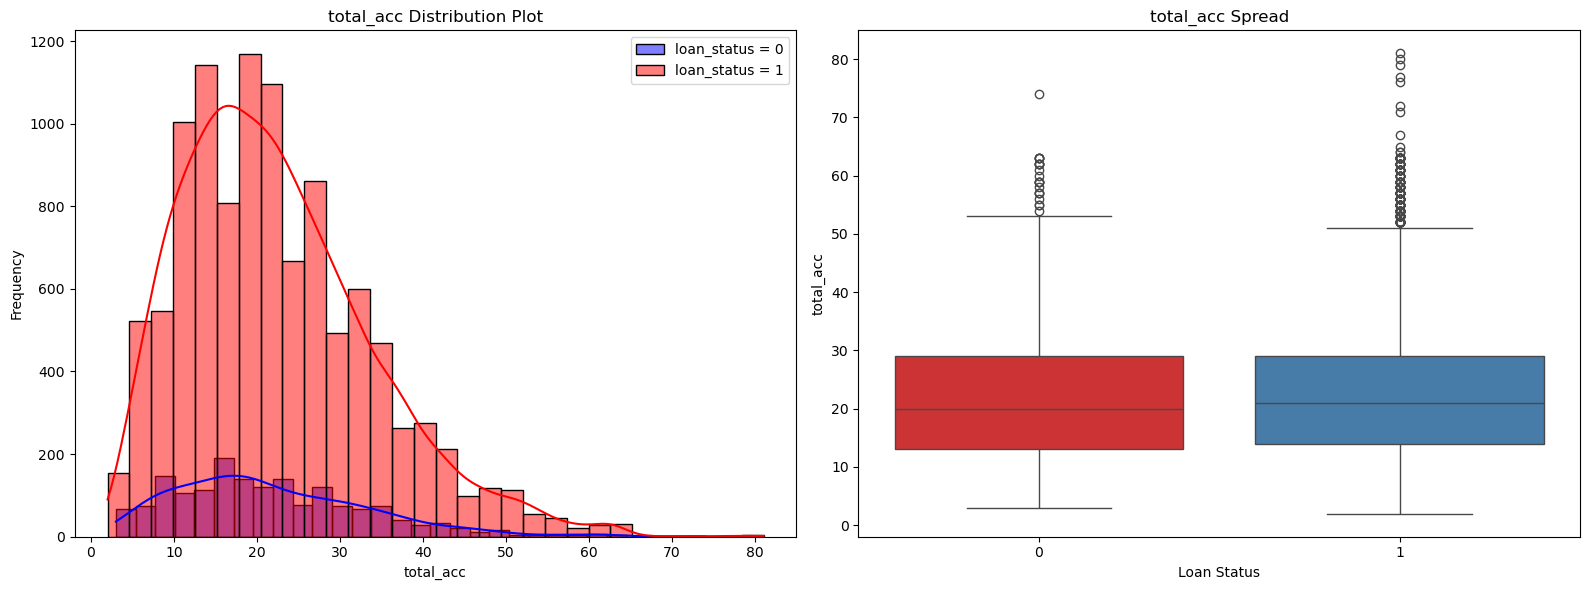

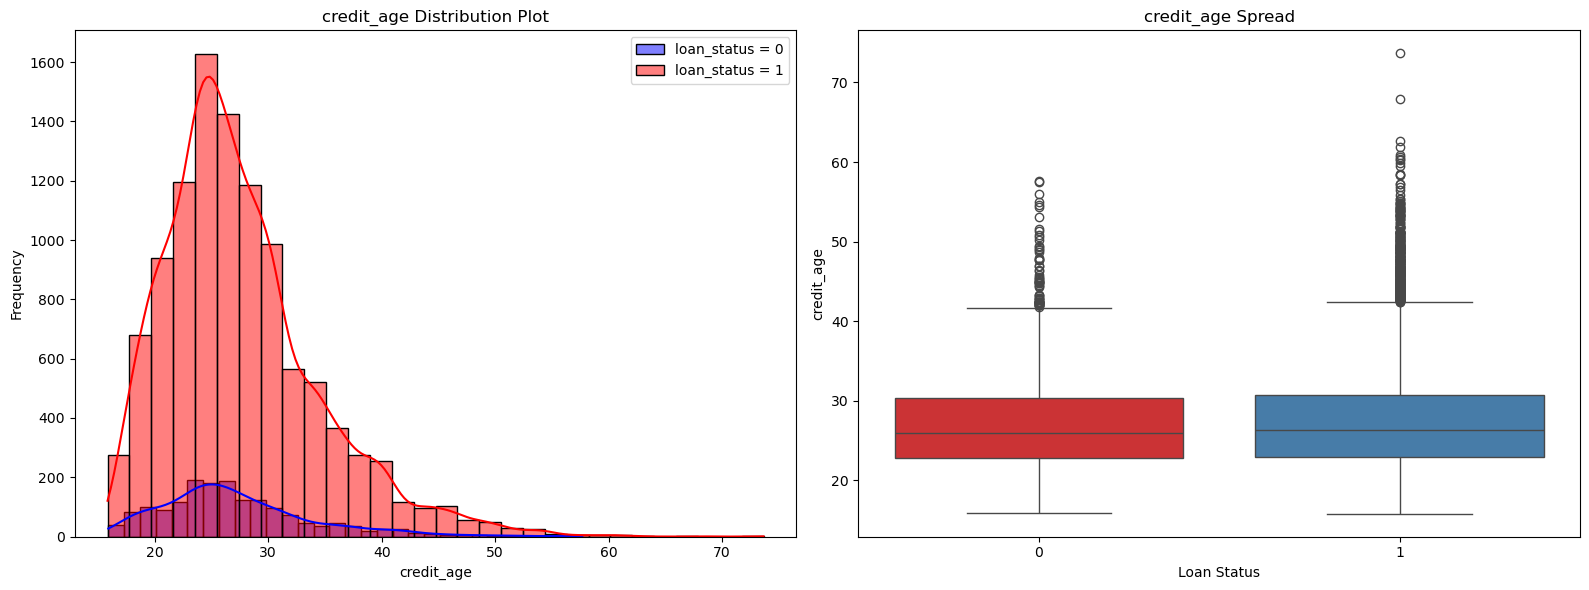

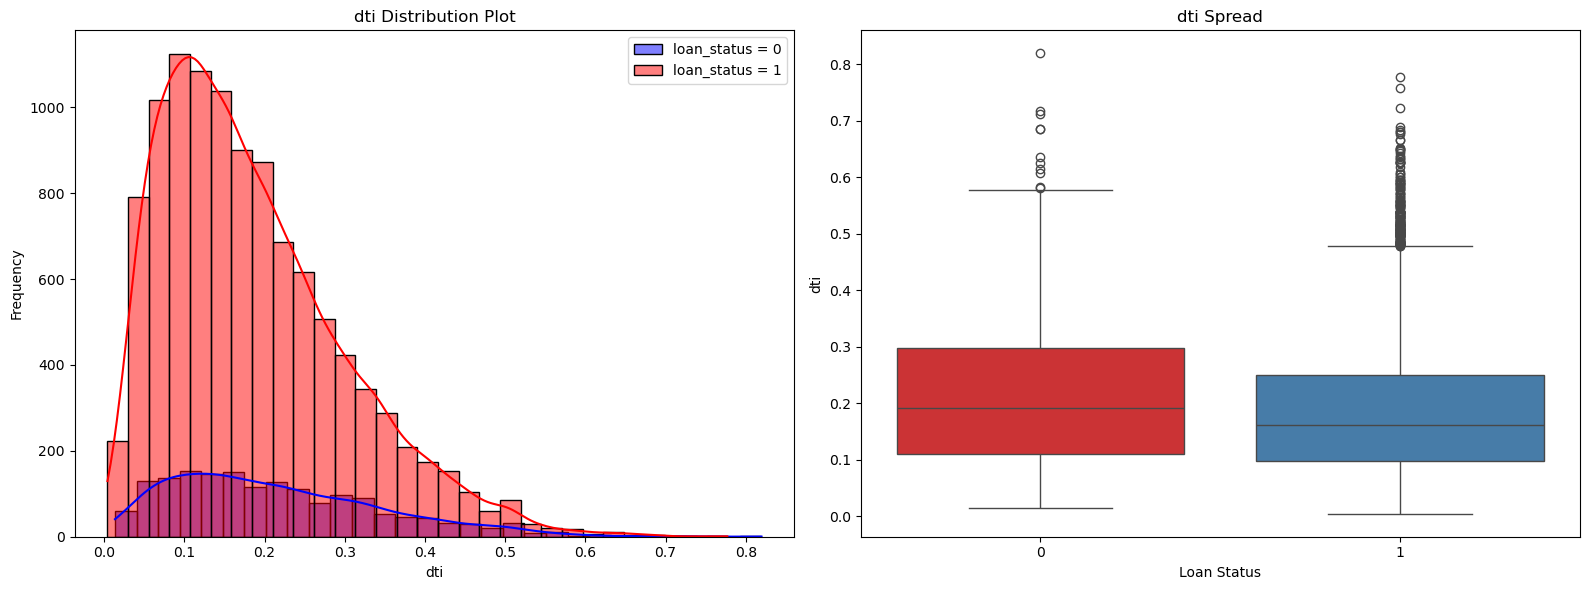

In [574]:
# Ploting distributions and spread for each feature for differentr loan status
for feature in continuous_features:
    plt.figure(figsize=(16, 6))
    
    # Distribution Plot with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df_0[feature], kde=True, label='loan_status = 0', color='blue', bins=30, alpha=0.5)
    sns.histplot(df_1[feature], kde=True, label='loan_status = 1', color='red', bins=30, alpha=0.5)
    plt.title(f'{feature} Distribution Plot')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    
    # Boxplot with updated syntax
    plt.subplot(1, 2, 2)
    sns.boxplot(x='loan_status', y=feature, data=df, palette='Set1',legend=False,hue='loan_status')
    plt.title(f'{feature} Spread')
    plt.xlabel('Loan Status')
    plt.ylabel(feature)
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Correlation between feature pairs

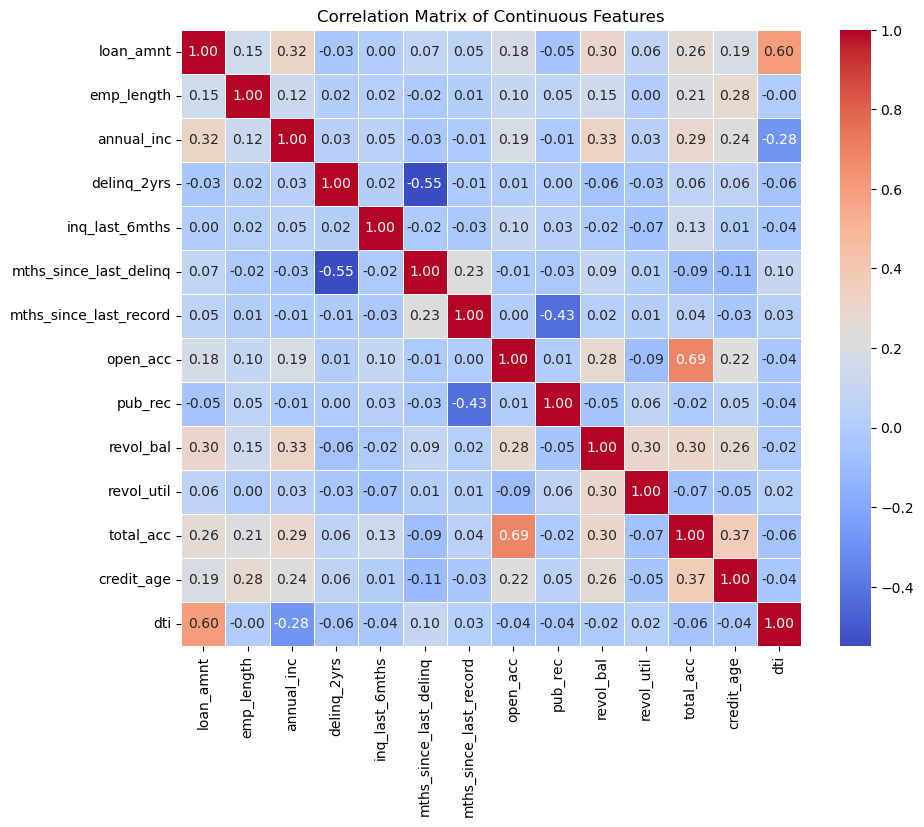

In [576]:
# Calculating correlation matrix
correlation_matrix = df[continuous_features].corr()

# print(correlation_matrix)
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Features')
plt.show()

In [577]:
df['pub_rec'].value_counts()

pub_rec
0    11837
1      639
2       11
3        3
4        1
Name: count, dtype: int64

### There is not a very strong co relation between any two features so we will not remove any 